<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Обзор-данных" data-toc-modified-id="1.-Обзор-данных-1">1. Обзор данных</a></span><ul class="toc-item"><li><span><a href="#1.1.-Вывод" data-toc-modified-id="1.1.-Вывод-1.1">1.1. Вывод</a></span></li></ul></li><li><span><a href="#2.-Предобработка-данных" data-toc-modified-id="2.-Предобработка-данных-2">2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#2.1.-Удаление-явных-дубликатов" data-toc-modified-id="2.1.-Удаление-явных-дубликатов-2.1">2.1. Удаление явных дубликатов</a></span></li><li><span><a href="#2.2.-Изменение-названий-колонок" data-toc-modified-id="2.2.-Изменение-названий-колонок-2.2">2.2. Изменение названий колонок</a></span></li><li><span><a href="#2.3.-Работа-с-выбросами" data-toc-modified-id="2.3.-Работа-с-выбросами-2.3">2.3. Работа с выбросами</a></span></li></ul></li><li><span><a href="#3.-Исследовательский-анализ-данных" data-toc-modified-id="3.-Исследовательский-анализ-данных-3">3. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#3.1.-Вывод" data-toc-modified-id="3.1.-Вывод-3.1">3.1. Вывод</a></span></li></ul></li><li><span><a href="#4.-Построение-модели-прогнозирования-оттока-пользователей" data-toc-modified-id="4.-Построение-модели-прогнозирования-оттока-пользователей-4">4. Построение модели прогнозирования оттока пользователей</a></span><ul class="toc-item"><li><span><a href="#4.1.-Вывод" data-toc-modified-id="4.1.-Вывод-4.1">4.1. Вывод</a></span></li></ul></li><li><span><a href="#5.-Кластеризация-пользователей" data-toc-modified-id="5.-Кластеризация-пользователей-5">5. Кластеризация пользователей</a></span><ul class="toc-item"><li><span><a href="#5.1.-Вывод" data-toc-modified-id="5.1.-Вывод-5.1">5.1. Вывод</a></span></li></ul></li><li><span><a href="#6.-Общий-вывод" data-toc-modified-id="6.-Общий-вывод-6">6. Общий вывод</a></span></li></ul></div>

# Проект "Исследование оттока клиентов фитнес-клуба"


<b>Цель:</b> Провести анализ и подготовить план действий по удержанию клиентов сети фитнес-центров «Культурист-датасаентист».

<b>Задачи:</b>
* Построить модель прогнозирования вероятности оттока для каждого клиента;
* Сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* Проанализировать основные признаки, наиболее сильно влияющие на отток;
* Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами.
    
    
<b>Описание данных</b>

Набор данных включает следующие поля:
* Churn — факт оттока в текущем месяце;

Текущие поля в датасете:
    
<b><i>Данные пользователя за предыдущий до проверки факта оттока месяц:</i></b>
* gender — пол
* Near_Location — проживание или работа в районе, где находится фитнес-центр
* Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* Phone — наличие контактного телефона
* Age — возраст
* Lifetime — время с момента первого обращения в фитнес-центр (в месяцах)

<b><i>Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента</i></b>
* Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах)
* Group_visits — факт посещения групповых занятий
* Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента
* Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц
* Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон



## 1. Обзор данных

Импортируем необходимые библиотеки для анализа данных.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage 

Загрузим данные из файла.

In [2]:
try:
    data = pd.read_csv('gym_churn.csv')
except:
    data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Выведем информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В датафрейме 4000 записей. 

У некоторых полей очень длинные названия, неудобные для работы. 

В названиях полей есть заглавные буквы (нарушение стиля).

Пропусков в данных нет, т.к. количество заполненных данных в колонках совпадает с количеством записей в датасете.

Все поля числовых типов. 

Вызовем метод describe() для первичного обзора данных.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Поля Near_Location, Partner, Promo_friends, Phone, Group_visits, Churn являются полями-признаками, т.к. принимают значение 0 и 1.

Поле gender (пол) тоже принимает значения 0 или 1. По предоставленным данным сложно сказать, как именно обозначен пол: (1-М, 0-Ж) или (1-Ж, 0-М).

Аномальных значений в данных не обнаружено.

В данных Contract_period, Avg_additional_charges_total, Month_to_end_contract есть выбросы, т.к. средние  и медианные значения значительно отличаются.

### 1.1. Вывод

1) Для более удобной работы с данными нужно привести названия полей датафрейма к нужному стилю (убрать заглавные буквы), а также дать полям более удобные названия:
* Near_Location -                     is_near
* Partner -                           is_partner
* Promo_friends -                     is_promo
* Phone -                             is_phone
* Group_visits -                      is_group_visits
* Avg_additional_charges_total -      additional_charges
* Month_to_end_contract -             month_to_end
* Avg_class_frequency_total -         visits_per_week_total
* Avg_class_frequency_current_month - visits_per_week
* Churn -                             is_churn

2) Нужно дополнительно исследовать выбросы в полях Contract_period, Avg_additional_charges_total, Month_to_end_contract и при необходимости удалить их.

## 2. Предобработка данных

### 2.1. Удаление явных дубликатов

Проверим наличие явных дубликатов в данных.

In [6]:
data.duplicated().sum()

0

Явных дубликатов нет.

### 2.2. Изменение названий колонок

Приведем названия колонок к нижнему регистру

In [7]:
data.columns = [x.lower() for x in data.columns.values]

In [8]:
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Для того, чтобы  работа с данными была удобнее, переименуем колонки.

In [9]:
data = data.rename(columns = {'near_location': 'is_near',\
                              'partner': 'is_partner', \
                              'promo_friends': 'is_promo',\
                              'phone': 'is_phone',\
                              'group_visits': 'is_group_visits',\
                              'avg_additional_charges_total': 'add_revenue',\
                              'month_to_end_contract': 'month_to_end',\
                              'avg_class_frequency_total': 'visits_per_week_total',\
                              'avg_class_frequency_current_month': 'visits_per_week',\
                              'churn': 'is_churn'})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4000 non-null   int64  
 1   is_near                4000 non-null   int64  
 2   is_partner             4000 non-null   int64  
 3   is_promo               4000 non-null   int64  
 4   is_phone               4000 non-null   int64  
 5   contract_period        4000 non-null   int64  
 6   is_group_visits        4000 non-null   int64  
 7   age                    4000 non-null   int64  
 8   add_revenue            4000 non-null   float64
 9   month_to_end           4000 non-null   float64
 10  lifetime               4000 non-null   int64  
 11  visits_per_week_total  4000 non-null   float64
 12  visits_per_week        4000 non-null   float64
 13  is_churn               4000 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Названия колонок изменены.

### 2.3. Работа с выбросами

Вызовем метод describe() для колонок с выбросами add_revenue, contract_period, month_to_end.

In [11]:
columns = ['add_revenue', 'contract_period', 'month_to_end']

In [12]:
data[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
add_revenue,4000.0,146.943728,96.355602,0.148205,68.86883,136.220159,210.949625,552.59074
contract_period,4000.0,4.681250,4.549706,1.000000,1.00000,1.000000,6.000000,12.00000
month_to_end,4000.0,4.322750,4.191297,1.000000,1.00000,1.000000,6.000000,12.00000


Для каждого из полей выведем 90, 95  99 перцентили.

In [13]:
for column in columns:
    print(column,':', np.percentile(data[column], [90, 95, 99]))

add_revenue : [277.7171989  323.44087589 400.99612505]
contract_period : [12. 12. 12.]
month_to_end : [12. 12. 12.]


Данные в колонке add_revenue ограничим 99 перцентилем, удалим строки со значением выше 401 в этой колонке.

In [14]:
add_revenue_max = np.percentile(data['add_revenue'], [99])[0]
data = data.loc[data['add_revenue'] <= add_revenue_max] 

Данные в колонках contract_period и month_to_end принимают значение 12 начиная с 90 перцентиля, т.е. таких данных достаточно много, поэтому не будем их удалять.

## 3. Исследовательский анализ данных

Выведем средние значения для тех, кто остался и тех, кто ушли в отток.

In [15]:
data.groupby('is_churn').agg('mean')

,gender,is_near,is_partner,is_promo,is_phone,contract_period,is_group_visits,age,add_revenue,month_to_end,lifetime,visits_per_week_total,visits_per_week
is_churn,,,,,,,,,,,,,
0,0.511724,0.873793,0.535172,0.356552,0.903103,5.755172,0.462759,29.983793,154.552960,5.289655,4.718276,2.023669,2.026776
1,0.510377,0.767925,0.355660,0.183962,0.902830,1.729245,0.268868,26.986792,114.790019,1.663208,0.986792,1.475433,1.045386


По средним значениям каждой группы можно сделать следующие выводы:
* пол не влияет на фактор оттока;
* ушедших в отток отличает:
    * небольшой контрактный период;
    * меньший возраст;
    * меньший размер трат на доп. услуги;
    * небольшое количество месяцев до окончания контракта;
    * короткий лайфтам (1 месяц);
    * количество посещений в неделю - 1 раз

Построим распределение признаков для каждой группы пользователей.

Для большинства ушедших в отток пользователей характерны:
* короткий контрактный период - 1 месяц.
* кол-во месяцев до окончания контракта - 1 месяц
* возраст 25-29 лет
* лайфтайм в фитнес-клубе - 1-2 месяца
* количество посещений в неделю в последний месяц меньше 2-х раз.

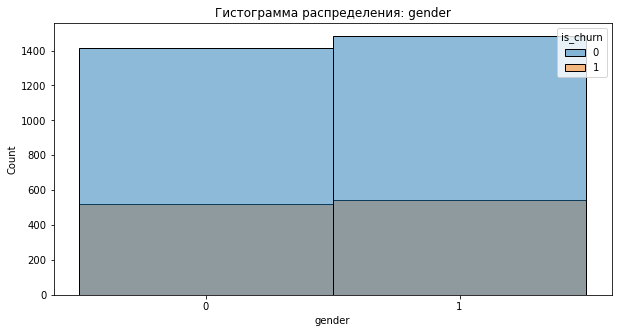

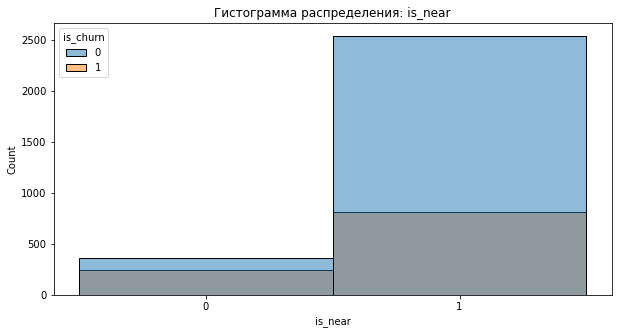

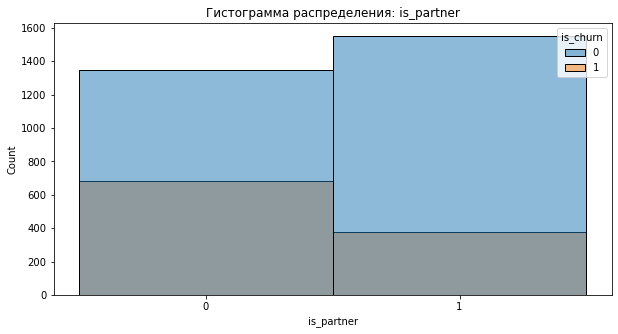

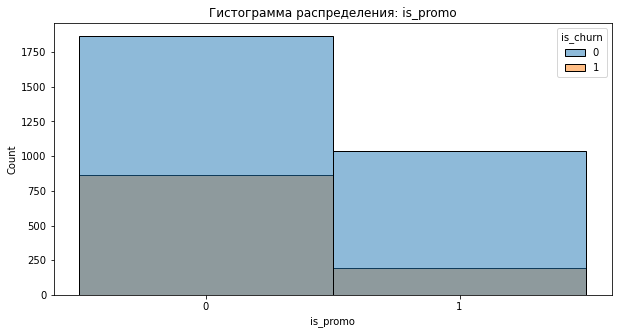

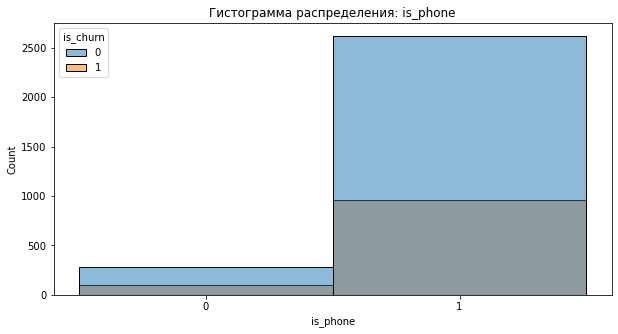

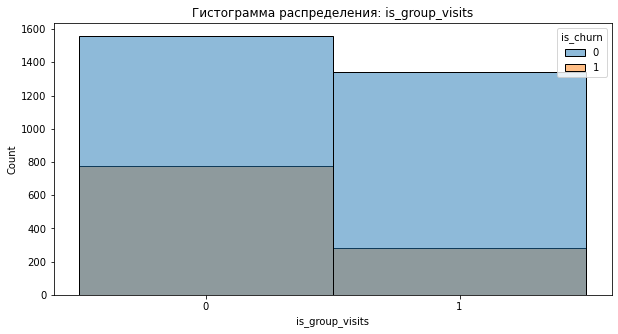

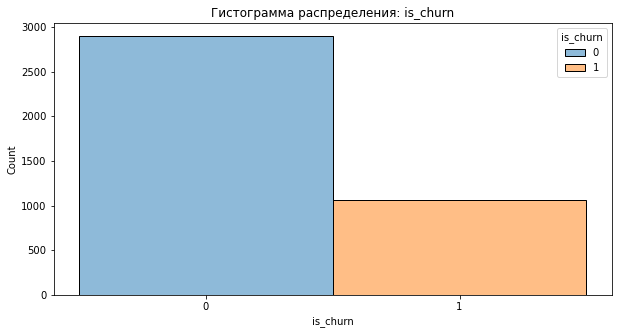

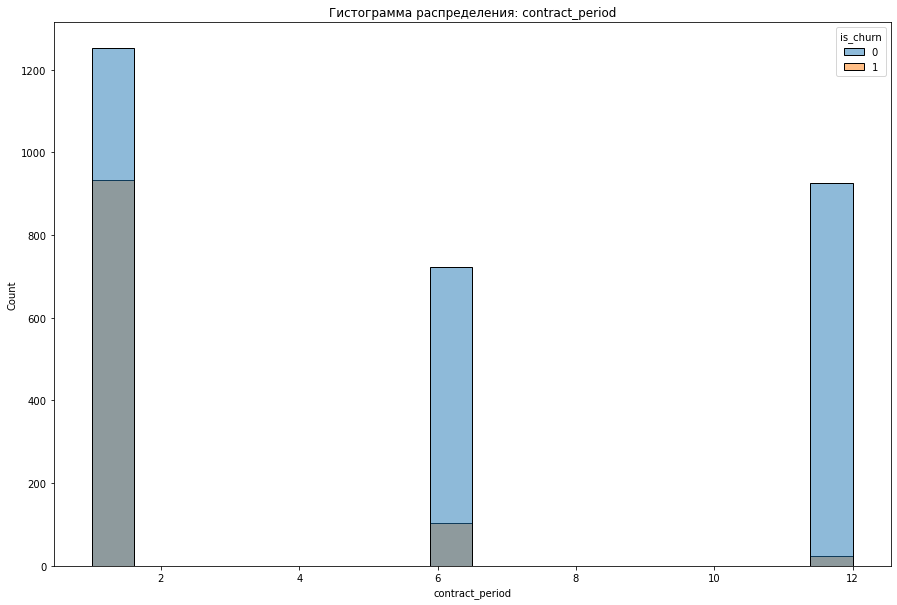

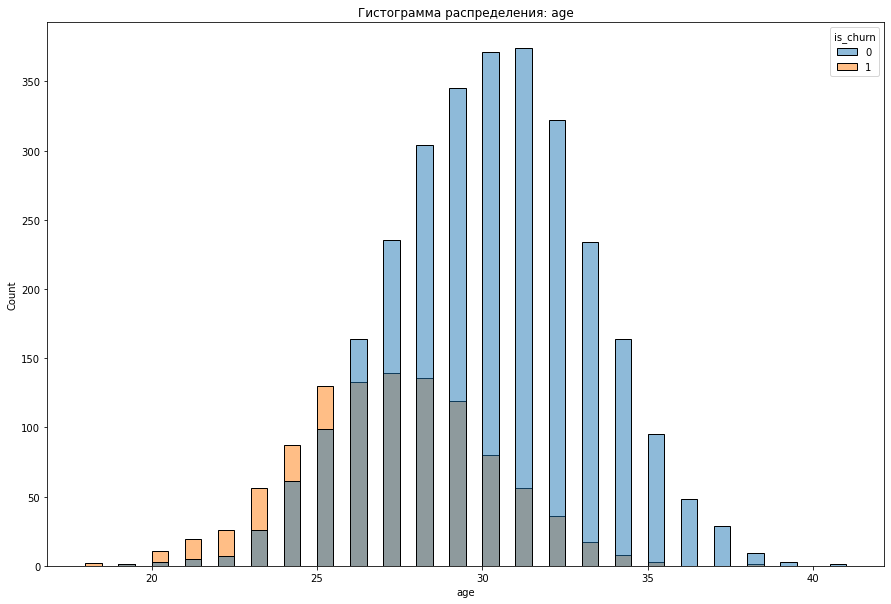

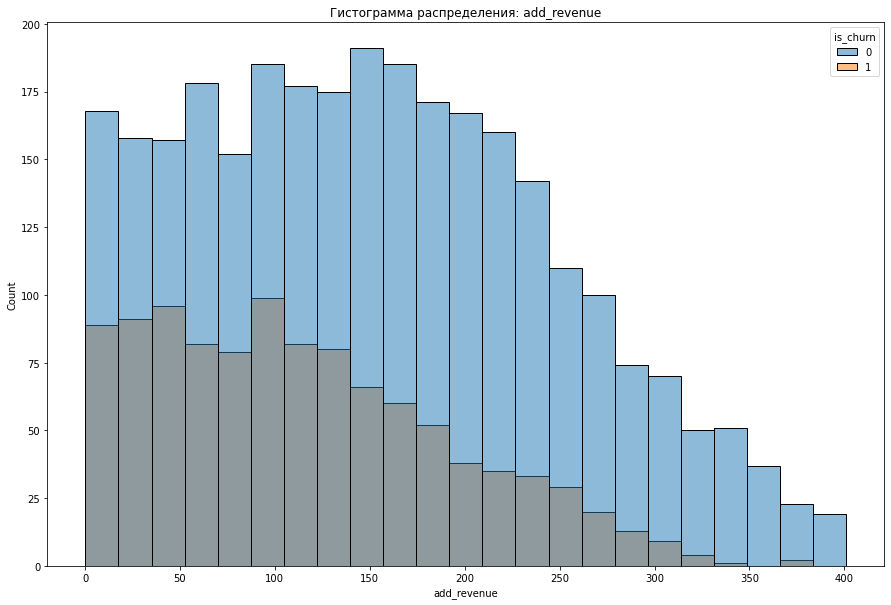

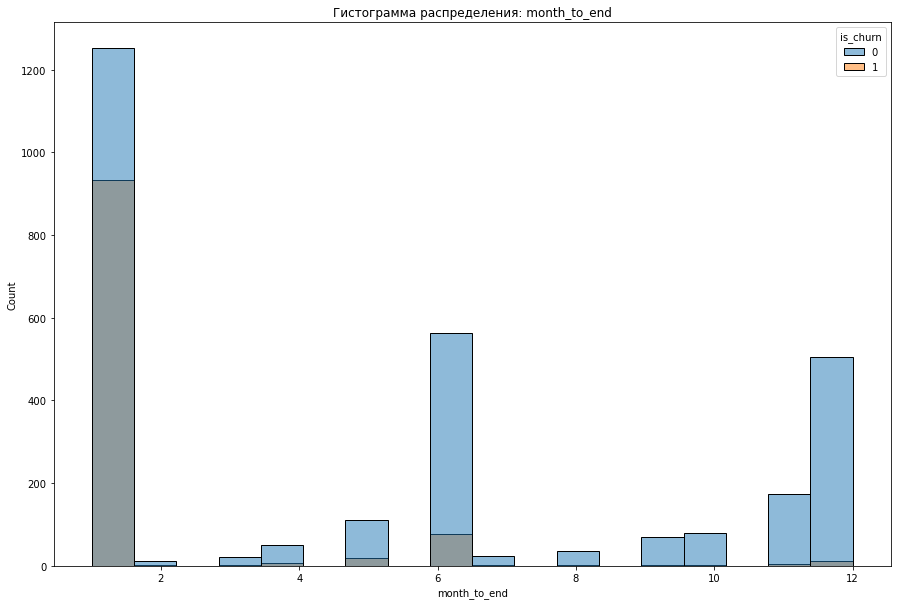

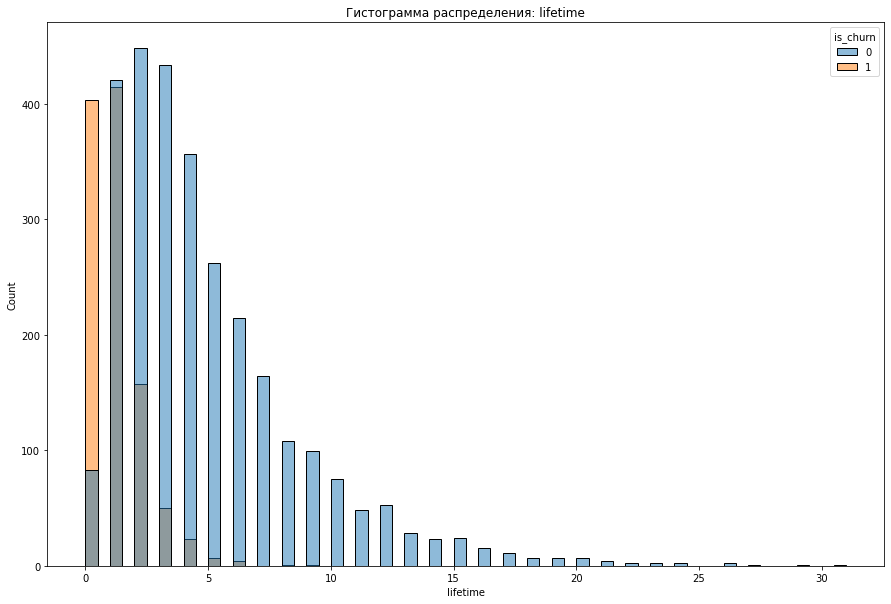

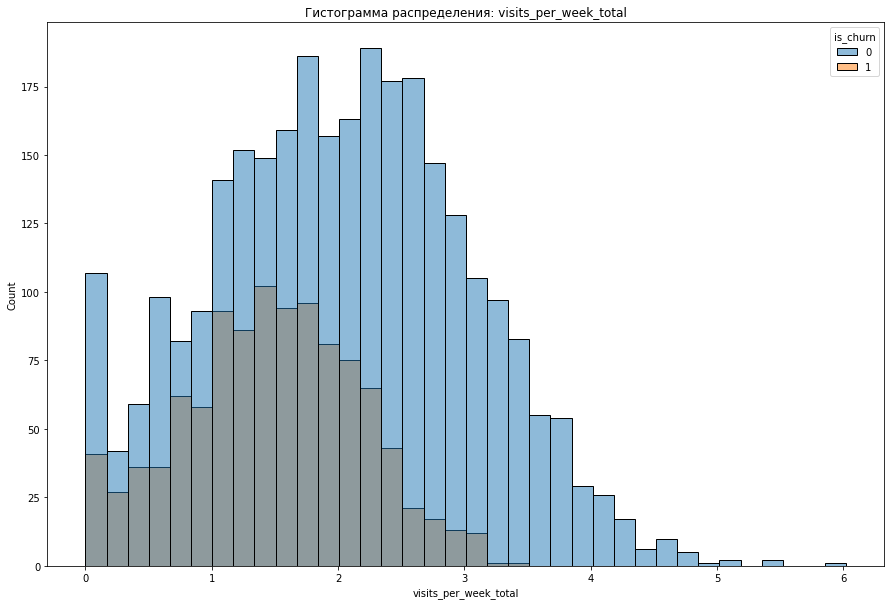

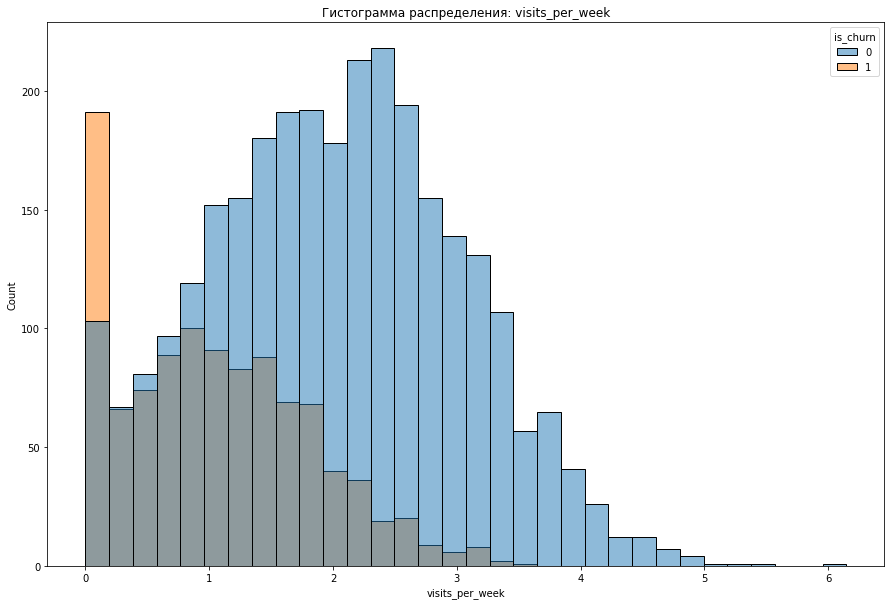

In [16]:
columns_01 = ['gender','is_near','is_partner','is_promo','is_phone','is_group_visits','is_churn'] # колонки с бинарными данными
for col_name in columns_01:
    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=col_name, hue='is_churn', discrete=True)
    plt.title(f'Гистограмма распределения: {col_name}')
    plt.xticks([0,1])
    plt.show()

columns_num = ['contract_period','age','add_revenue','month_to_end','lifetime','visits_per_week_total','visits_per_week'] #числовые колонки
for col_name in columns_num:
    plt.figure(figsize=(15, 10))
    sns.histplot(data, x=col_name, hue='is_churn')
    plt.title(f'Гистограмма распределения: {col_name}')
    plt.show()

Построим тепловую карту для матрицы корреляции признаков.

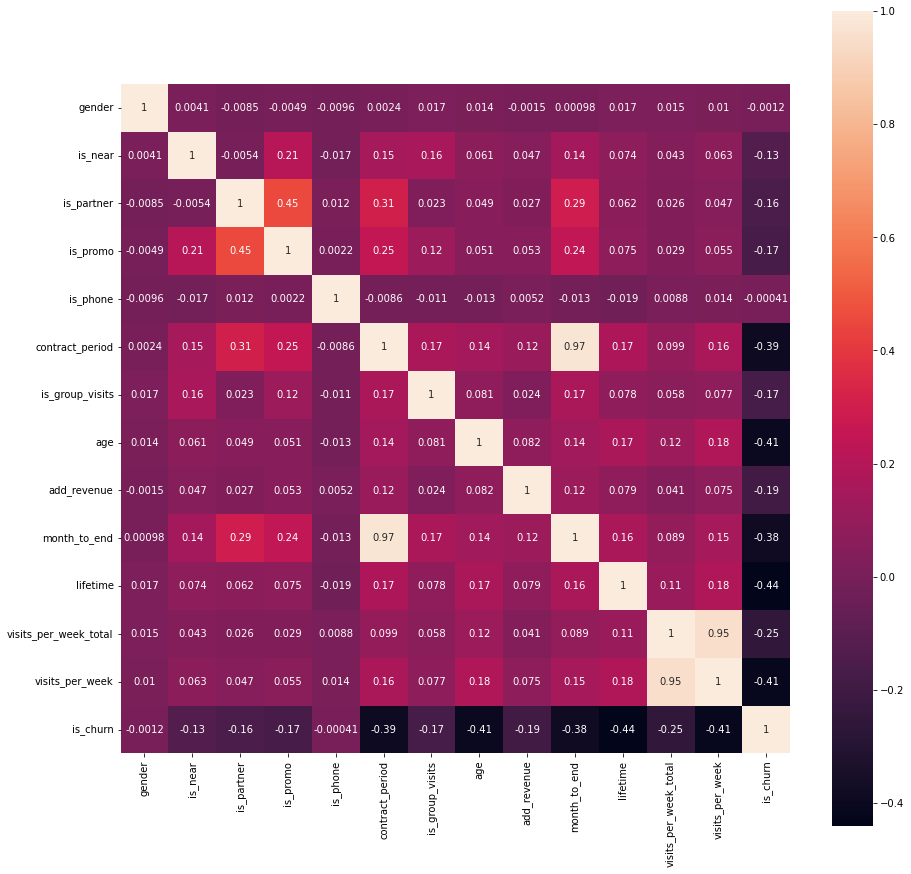

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),square = True, annot = True)# нарисуем heatmap
plt.show()

Есть небольшая обратная корреляция между целевой переменной (is_churn) и другими признаками в пределах 0.4 для
* contract_period (-0.39)
* age (-0.41)
* month_to_end (-0.38)
* lifetime (-0.44)
* visits_per_week (-0.41)

Выраженная корреляция между признаками:
* month_to_end и contract_period (0.97)
* visits_per_week и visits_per_week_total (0.95)

Выраженная корреляция между признаками в данных может отрицательно сказаться на качестве обучаемой модели, поэтому один признак из каждой пары обычно удаляют. 

Признаки visits_per_week_total и visits_per_week отражают количество посещений в неделю за весь период и за последний месяц. Поскольку они сильно коррелируют и показывают похожую информацию, можно оставить более показательный из них - visits_per_week (корреляция этого признака с целевой переменной по модулю выше, чем корреляция visits_per_week_total и is_churn). 

Признаки contract_period и month_to_end показывают разную информацию - длительность контракта и количество месяцев до окончания контракта. Оба признака важны для кластеризации, т.к. имеют небольшую корреляцию с целевой переменной, и их лучше оставить.

Удалим visits_per_week_total.

In [18]:
data=data.drop(columns = ['visits_per_week_total'])

### 3.1. Вывод

Наиболее важные признаки для прогнозирования оттока:
* contract_period 
* age 
* lifetime
* month_to_end
* visits_per_week 

Для большинства ушедших в отток пользователей характерны:
* короткий контрактный период - 1 месяц;
* небольшое количество месяцев до окончания контракта - 1 месяц;
* возраст 25-29 лет;
* небольшой лайфтайм в фитнес-клубе - 1-2 месяца;
* количество посещений в неделю в последний месяц 0-1 раз.
* небольшие траты на доп.услуги по сравнению с теми, кто остался.

## 4. Построение модели прогнозирования оттока пользователей

Для прогнозирования оттока пользователей нужно построить модель ML, которая будет обучаться на данных, где для каждого клиента известны значения признаков и значение целевой переменной. Целевая переменная - бинарная величина (y=0 - клиент не уйдет в отток, y=1 - уйдет в отток). Поэтому, тип нашей задачи "Обучение с учителем: бинарная классификация", подходящими алгоритмами для которой являются:
* логистическая регрессия (метод LogisticRegression библиотеки sklearn);
* случайный лес (метод RandomForestClassifier библиотеки sklearn).

Сначала проведем стандартизацию данных, затем в цикле применим каждый из алгоритмов обучения моделей и выведем метрики для оценки качества моделей (accuracy, precision и recall). По метрикам определим лучшую модель.

In [19]:
# разделим данные на целевую переменную (y, колонка признака оттока is_churn) и признаки (матрица X - остальные колоки) и 
X = data.drop(columns=['is_churn'])
y = data['is_churn']

# разделяем модель на обучающую и валидационную выборку в соотношении 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

In [20]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# задаём список моделей
models = [
    LogisticRegression(solver='liblinear',random_state = 0),
    RandomForestClassifier(random_state = 0)
]

In [21]:
# функция, которая принимает на вход модель и данные, обучает модель и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'accuracy:{:.2f} precision:{:.2f} recall:{:.2f} '.format( 
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)
        )
    )

In [22]:
# цикл, который для каждой модели списка выполняет процедуру make_prediction (обучает модели и выводит метрики по списку моделей)
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0, solver='liblinear')
accuracy:0.91 precision:0.82 recall:0.84 
RandomForestClassifier(random_state=0)
accuracy:0.90 precision:0.82 recall:0.81 


Лучшие показатели у модели логистической регрессии, поэтому назначим ее финальной моделью.

In [23]:
# назначим логистическую регрессию финальной моделью.
final_model = models[0]

Создадим датафрейм с коэффициентами модели.

In [24]:
features = pd.DataFrame({'feature': X.columns,'coeff': final_model.coef_[0]})
features['coeff_abs'] = np.abs(final_model.coef_[0])

In [25]:
features.sort_values(by = 'coeff_abs', ascending = False)

,feature,coeff,coeff_abs
10,lifetime,-3.535904,3.535904
11,visits_per_week,-1.278237,1.278237
7,age,-1.121544,1.121544
5,contract_period,-0.979841,0.979841
8,add_revenue,-0.556171,0.556171
9,month_to_end,-0.407802,0.407802
6,is_group_visits,-0.399822,0.399822
3,is_promo,-0.206626,0.206626
1,is_near,-0.100241,0.100241
4,is_phone,-0.090497,0.090497


### 4.1. Вывод
* Модель прогнозирования оттока клиентов построена на основе логистической регресии.
* Наиболее важными признаками модели являются лайфтайм, количество посещений в последний месяц, возраст, контрактный период, количество месяцев до окончания контракта, расходы на доп.услуги.

## 5. Кластеризация пользователей

Для разделения (сегментации) клиентов по схожести поведения на группы нужна кластеризация данных.

Для кластеризации пользовтелей проведем стандартизацию данных и построим дендрограмму для определения количества кластеров.

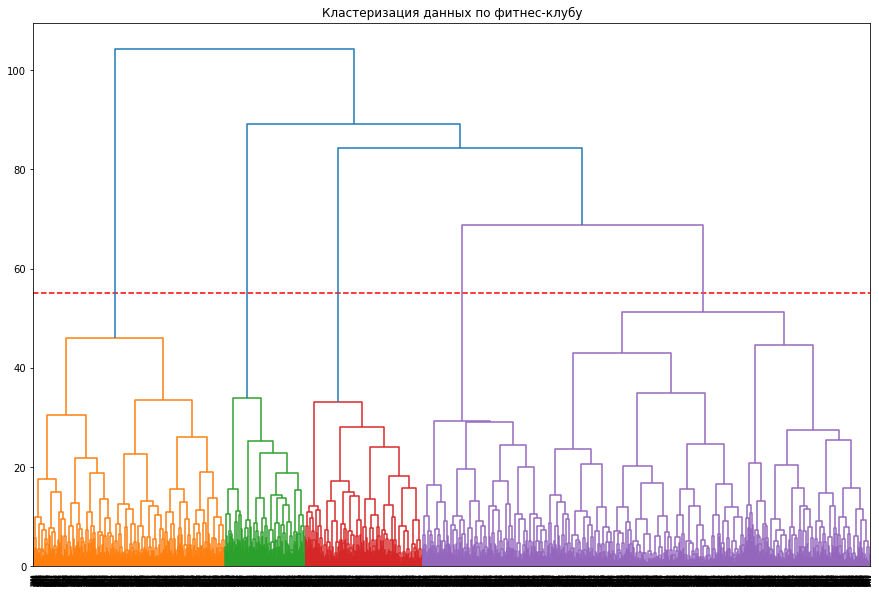

In [26]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)
#В переменную linked сохраним таблицу «связок» между объектами. 
linked = linkage(X_sc, method = 'ward') 
# Построим дендрограмму по данным linked:
plt.figure(figsize=(15, 10)) 
plt.axhline(y=55, color='red', linestyle='--')
dendrogram(linked, orientation='top')
plt.title('Кластеризация данных по фитнес-клубу')
plt.show() 


Если взять расстояние между кластерами около 55, то получим количество кластеров =5.

In [27]:
# зададим модель KMeans с числом кластеров 5 
cluster = KMeans(n_clusters=5, random_state=0)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = cluster.fit_predict(X_sc)

# сохраним метки кластера в поле нашего датасета
data['cluster'] = labels

# выведем статистику по средним значениям наших признаков по кластеру
data_group = data.groupby('cluster').agg('mean').reset_index()
data_group

,cluster,gender,is_near,is_partner,is_promo,is_phone,contract_period,is_group_visits,age,add_revenue,month_to_end,lifetime,visits_per_week,is_churn
0,0,0.526042,0.864583,0.468750,0.307292,0.0,4.796875,0.427083,29.312500,142.458636,4.484375,3.934896,1.720239,0.268229
1,1,0.516066,1.000000,0.231475,0.000000,1.0,2.100984,0.374426,28.914098,138.569386,2.001311,3.314098,1.671064,0.361967
2,2,0.505360,0.998469,0.773354,1.000000,1.0,3.024502,0.456355,29.127106,141.096934,2.831547,3.759571,1.762186,0.249617
3,3,0.505814,0.000000,0.468992,0.079457,1.0,2.337209,0.213178,28.554264,132.943034,2.184109,2.852713,1.565904,0.434109
4,4,0.504535,0.951247,0.735828,0.472789,1.0,11.673469,0.548753,29.994331,162.271737,10.604308,4.803855,2.061339,0.020408


Среднее значения такого признака, как возраст, для всех кластеров приблизительно одинаковое - 29 лет. Также несущественны различия средних значений признака visits_per_week.

Построим графики распределения каждого признака для каждого из кластеров (для бинарных величин - столбчатые диаграммы, для числовых - диаграммы размаха).

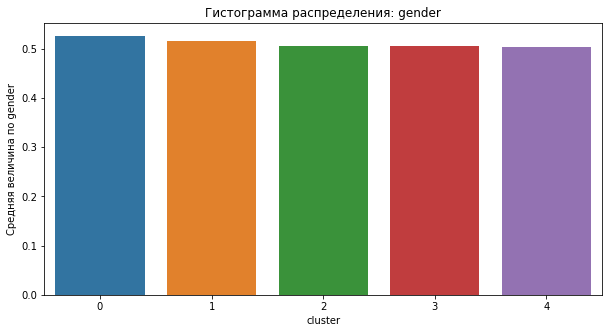

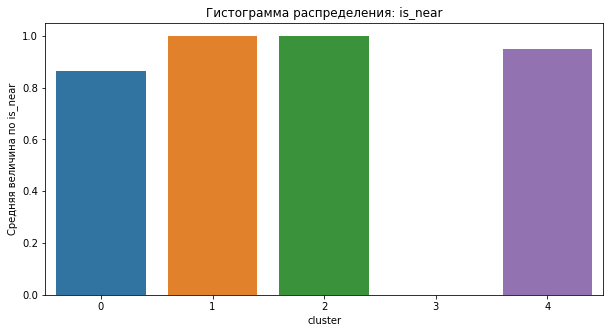

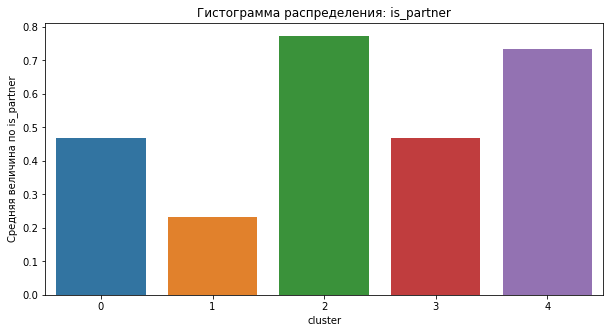

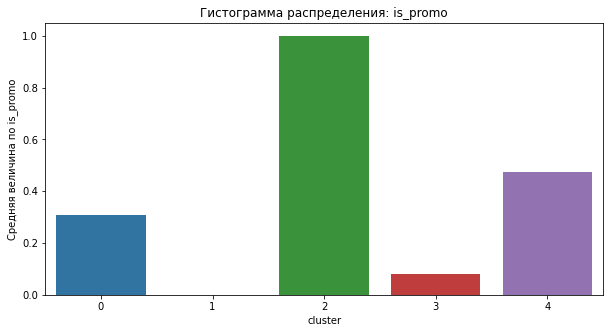

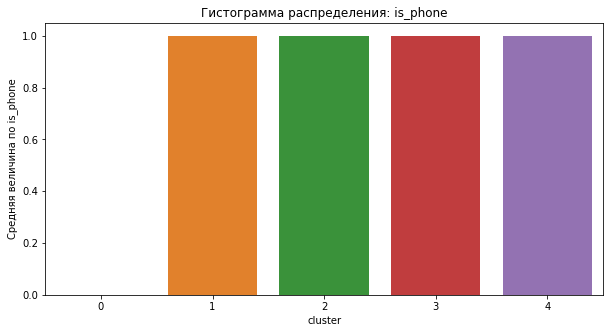

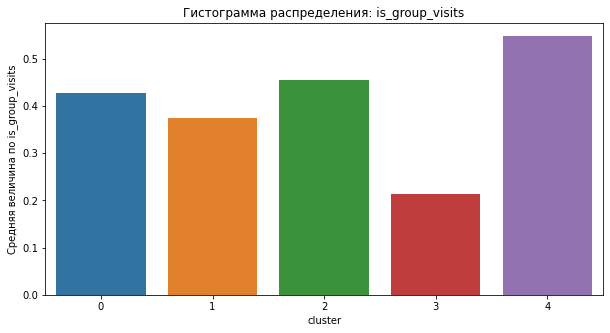

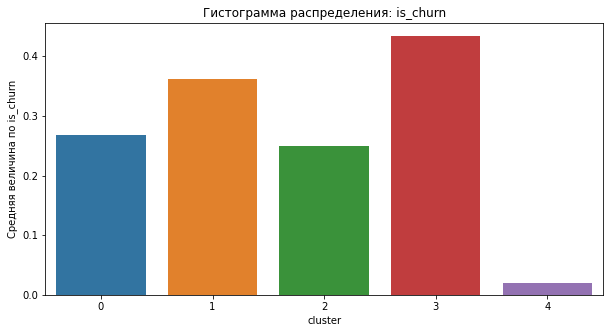

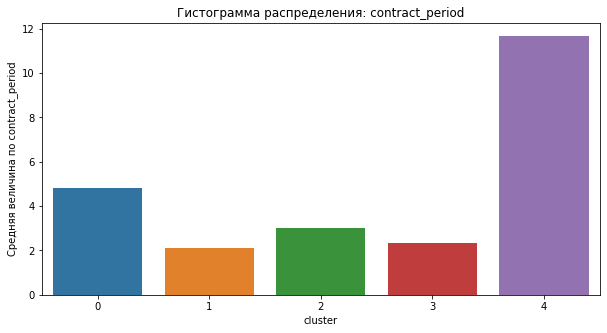

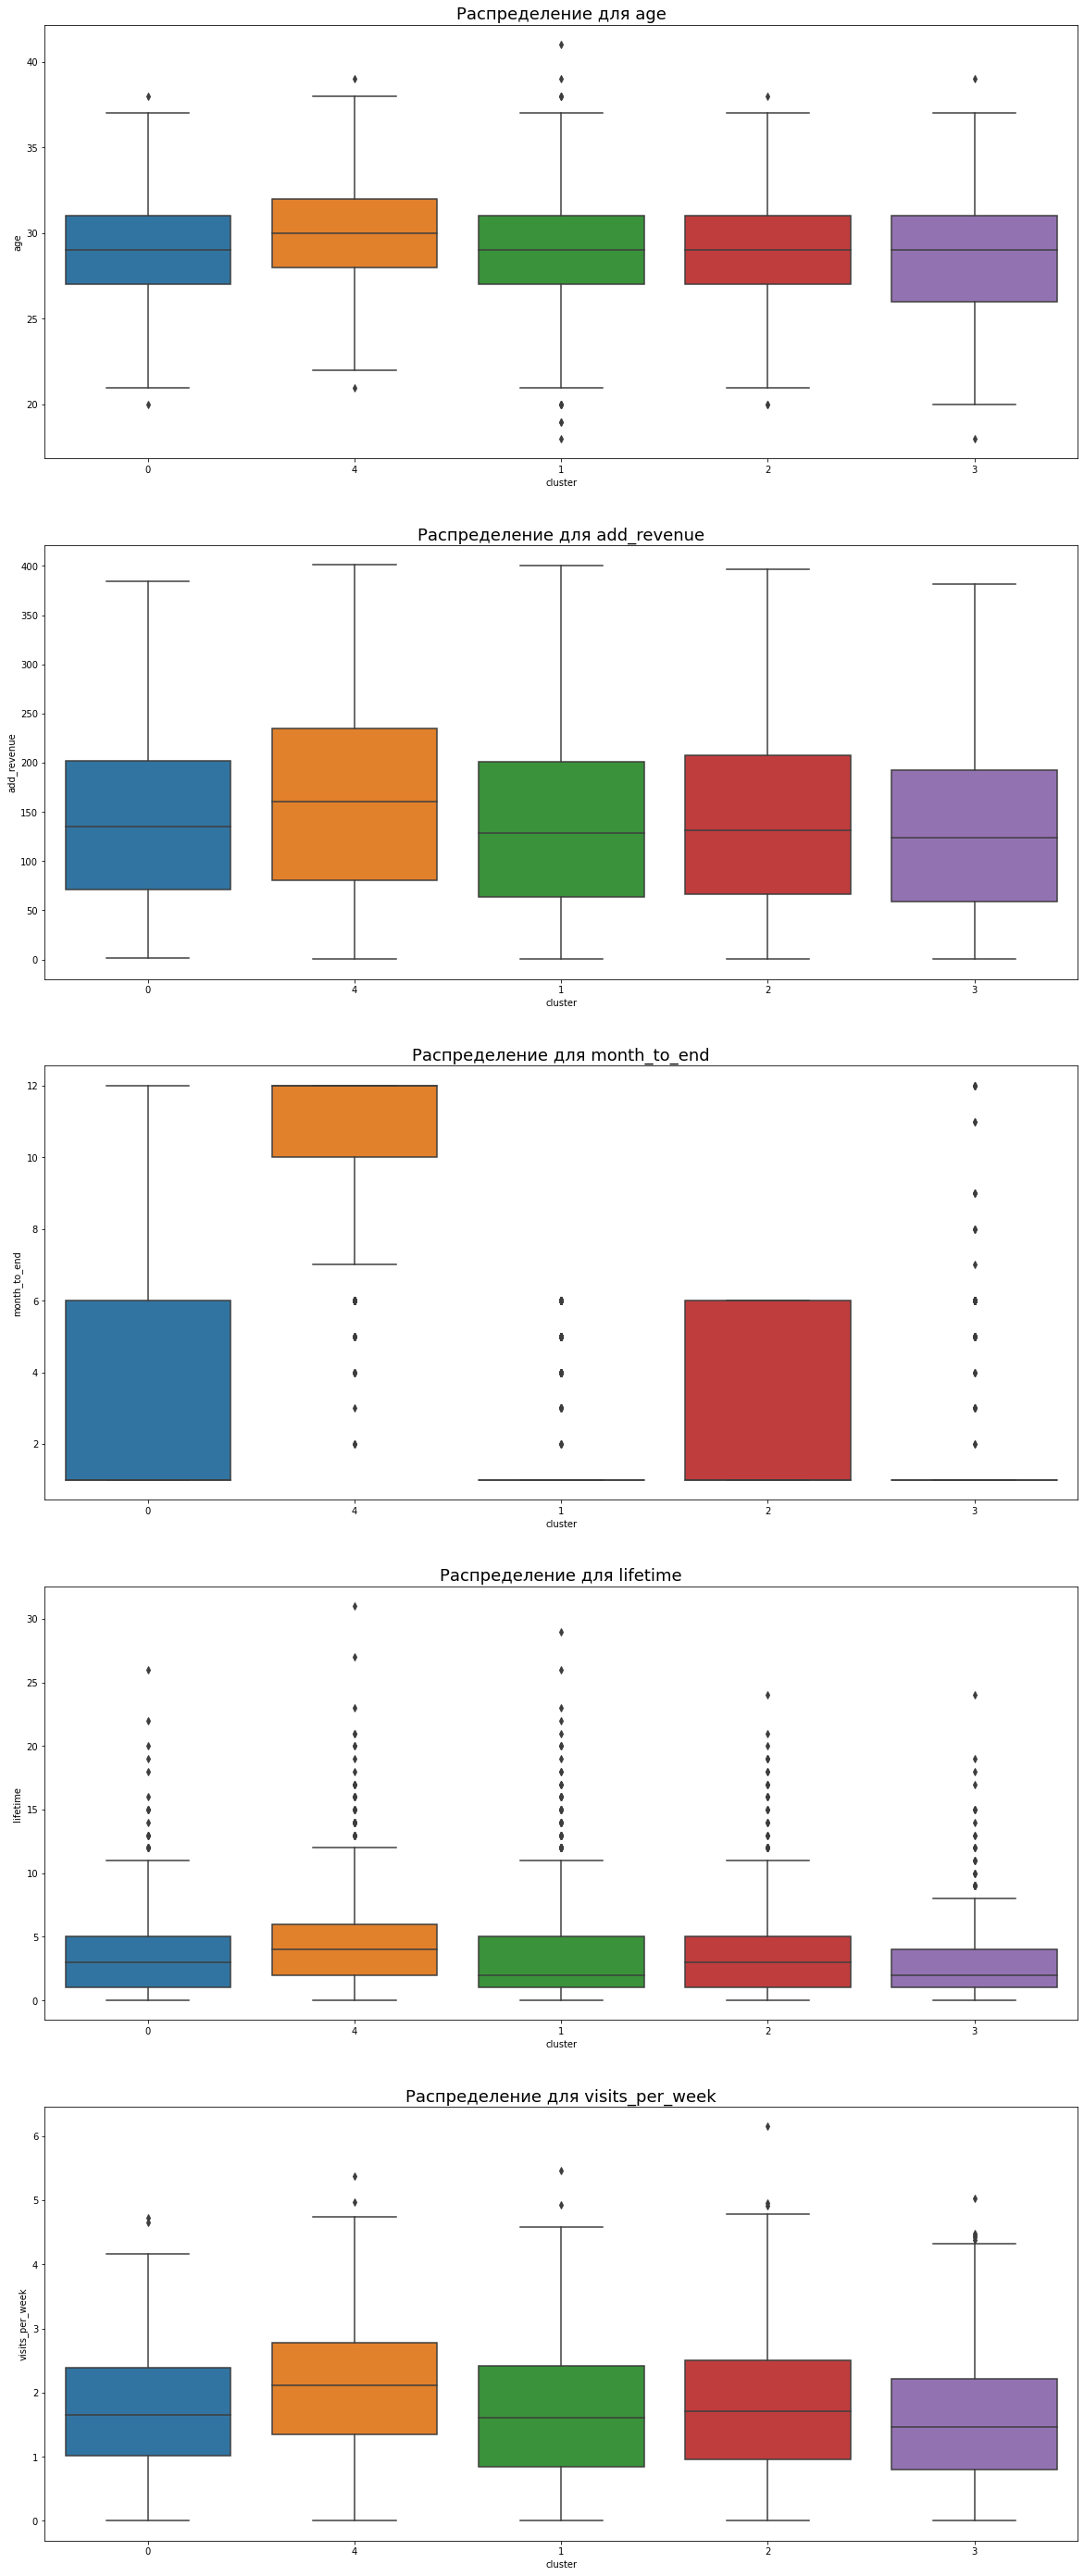

In [28]:
columns = ['gender','is_near','is_partner','is_promo','is_phone','is_group_visits','is_churn','contract_period',] # колонки с бинарными данными
for col_name in columns:
    plt.figure(figsize=(10, 5))
    sns.barplot( y=data_group[col_name], x=data_group['cluster'].astype('str'))
    plt.title(f'Гистограмма распределения: {col_name}')
    #plt.xticks([0,1])
    plt.ylabel('Средняя величина по '+col_name)
    plt.show()

columns = ['age','add_revenue','month_to_end','lifetime','visits_per_week'] #числовые колонки
m = len(columns)
fig, axes = plt.subplots(m, 1, figsize=(20,50))
axe = axes.ravel()
for j,column in enumerate(columns):
    boxplot = sns.boxplot(data = data , x = data['cluster'].astype('str'), y = column,ax = axe[j])
    boxplot.axes.set_title('Распределение для '+column, fontsize = 18)
 

Для каждого полученного кластера посчитаем долю оттока.

In [29]:
pivot = data.pivot_table(index = 'cluster', columns = 'is_churn', values = 'gender', aggfunc = 'count').reset_index()
pivot.columns = ['cluster','no_churn','churn']
pivot['churn_share'] = round(pivot['churn'] / (pivot['churn'] + pivot['no_churn']), 2)
pivot.sort_values(by = 'churn_share', ascending = True)

,cluster,no_churn,churn,churn_share
4,4,864,18,0.02
2,2,490,163,0.25
0,0,281,103,0.27
1,1,973,552,0.36
3,3,292,224,0.43


Самый надежный кластер - 4 (2% оттока). Кластер, наиболее склонный к оттоку - 3 (43% оттока.)

Кластер 4 - самый устойчивый к оттоку.
* Большой контрактный период (12 месяцев),
* количество месяцев до окончания контракта >5. 
* Лайфтайм от 2 до 6 месяцев, 
* количество посещений в неделю 2-3 раза, 
* самые большие расходы на доп.услуги (в среднем около 160)

Кластер 2 - 2-й по устойчивости к оттоку.
* Контрактный период 1-6 месяцев,
* количество месяцев до окончания контракта - 1 или 6.
* Лайфтайм от 0 до 5 месяцев,
* количество посещений в неделю  0-2 раза,
* расходы на доп. услуги на 2 месте по величине (141)

Кластер 0 - занимает среднюю позицию в рейтинге
* Контрактный период 0, 6 и 12 месяцев,
* количество месяцев до окончания контракта - 1.
* Лайфтайм - 0-4 месяца,
* количество посещений в неделю  0-2 раза,
* расходы на доп. услуги на 3 месте по величине (142)

Кластер 1 - среденесклонный к оттоку.
* контрактный период 1 месяц, 
* количество месяцев до окончания контракта - 1.
* Лайфтайм от 0 до 3 месяцев,
* количество посещений в неделю  0-2 раза, 
* расходы на доп. услуги чуть больше, чем у кластера 3 (138).

Кластер 3 - самый склонный к оттоку.
* У большинства пользователей - контрактный период 1 месяц,
* количество месяцев до окончания контракта - 1. 
* Лайфтайм от 0 до 2 месяцев, 
* количество посещений в неделю меньше 2-х раз, 
* самые маленькие расходы на доп.услуги (в среднем около 132)

### 5.1. Вывод
* Самые надежные клиенты заключают долгосрочные контракты, посещают клуб от 2-х раз в неделю, предпочитают активно пользоваться платными дополнительными услугами.
* Клиенты, склонные к оттоку, чаще всего те, кто в клубе относительно недавно. Они заключают контракты на 1 месяц, посещают клуб менее 2-х раз в неделю и менее склонны тратить денги на дополнительные услуги.

## 6. Общий вывод 

<b>Для прогнозирования оттока построена модель на основе логистической регресии.</b>

<b>Наиболее важными признаками для выявления клиентов, склонных к оттоку, являются:</b>
* лайфтайм, 
* количество посещений в последний месяц, 
* контрактный период, 
* количество месяцев до окончания контракта.

<b>Самые надежные клиенты</b> заключают долгосрочные контракты, посещают клуб от 2-х раз в неделю, предпочитают активно пользоваться платными дополнительными услугами.

<b>Клиенты, склонные к оттоку</b>, чаще всего те, кто в клубе относительно недавно. Они заключают контракты на 1 месяц, посещают клуб менее 2-х раз в неделю и менее склонны тратить денги на дополнительные услуги.

<b>Базовые рекомендации по работе с клиентами:</b>
* Надежных клиентов (кластеры 4, 2) при лайфтайме от 6 месяцев можно поощрять накопительными бонусами на выбор, например, за каждые 2+ месяца к лайфтайму.   
* Среди клиентов (кластеры 0, 1, 3), склонных к оттоку, запустить розыгрыш определенной суммы (например, 15 000 р.) среди тех, кто
посетит клуб как минимум 12 раз в течение 30 дней.
* Стимулировать клиентов, склонных к оттоку, у которых заканчивается контракт (кластеры 0,1,3), заключать долгосрочные договоры (6-12 месяцев) за счет снижения стоимости контракта с большим сроком.
* Для клиентов, которые ближе всего к оттоку (кластер 3), предложить акцию: за 8 посещений за последние 30 дней предложить бонус,  который будет активен с середины следующего месяца.
* Затраты на программу удержания склонных к оттоку клиентов не должны превышать прибыль, которую приносят клиенты.

Примерные бонусы : бесплатные доп. услуги, бесплатные тренировки с инструктором.